## Import de fonctions

In [42]:
import prisha_final_functions_bnw as pf
import prisha_final_functions_color as pc

#import image_compression as ic
#import color_compression as cc


import numpy as np
from PIL import Image
from scipy.ndimage import gaussian_filter

import skimage.morphology as morpho
import matplotlib.pyplot as plt

import time

## Tests sur des images en niveaux de gris


### Premier test : reconstitution d'un trait horizontal

source_region_mask.shape: (61, 61)
source_region_mask.shape: (61, 61)
source_region_mask.shape: (61, 61)
source_region_mask.shape: (61, 61)
source_region_mask.shape: (61, 61)
source_region_mask.shape: (61, 61)
source_region_mask.shape: (61, 61)
source_region_mask.shape: (61, 61)
source_region_mask.shape: (61, 61)
source_region_mask.shape: (61, 61)
source_region_mask.shape: (61, 61)
source_region_mask.shape: (61, 61)
source_region_mask.shape: (61, 61)
source_region_mask.shape: (61, 61)
source_region_mask.shape: (61, 61)
source_region_mask.shape: (61, 61)
source_region_mask.shape: (61, 61)
source_region_mask.shape: (61, 61)
source_region_mask.shape: (61, 61)
source_region_mask.shape: (61, 61)
source_region_mask.shape: (61, 61)
source_region_mask.shape: (61, 61)
source_region_mask.shape: (61, 61)
source_region_mask.shape: (61, 61)
source_region_mask.shape: (61, 61)
source_region_mask.shape: (61, 61)
source_region_mask.shape: (61, 61)
source_region_mask.shape: (61, 61)
source_region_mask.s

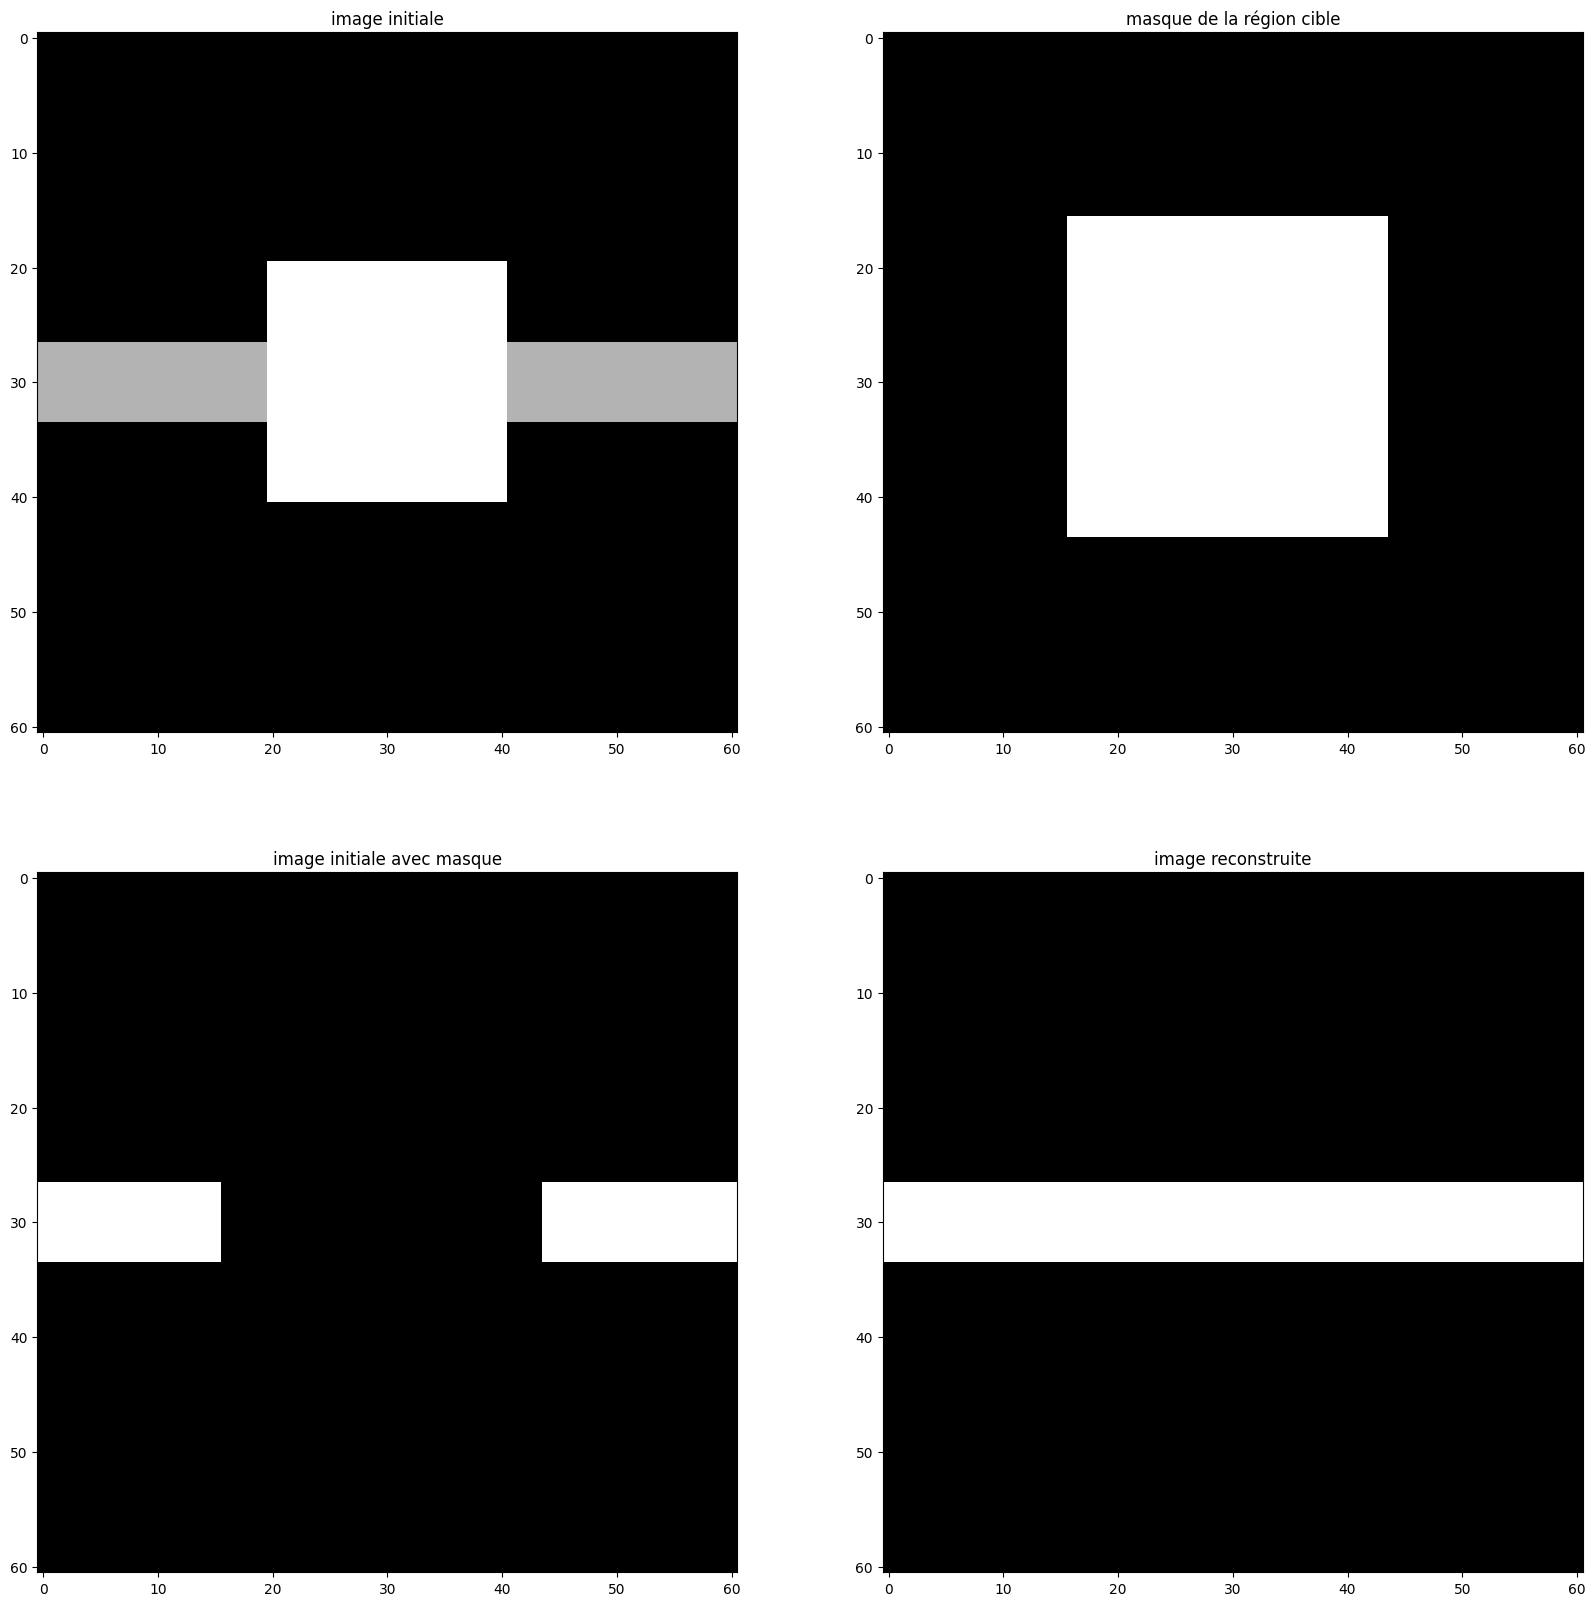

gray image matrix shape:  (61, 61)
taille du patch : 3x3
Temps d'execution: 19.7929 secs


In [2]:

# importation de l'image
image = Image.open("./images/a-b-c.ppm.png")
image_matrix = np.array(image)

#conversion de l'image en niveaux de gris
gray_image = image.convert("L")
#gray_image.show()
gray_image_matrix = np.array(gray_image)


# création du masque de la région cible
target_region_mask = np.array([[False for i in range(gray_image_matrix.shape[0])] for j in range(gray_image_matrix.shape[1])])
target_region_mask[16:44,16:44] = True 
target_region_image = Image.fromarray(target_region_mask)
#target_region_image.show()

# affichage de la région cible sur l'image initiale
image_initiale_matrix = gray_image_matrix*(1-target_region_mask)
image_initiale = Image.fromarray(image_initiale_matrix.astype(np.uint8))
#image_initiale.show()

# reconstitution de l'image avec notre méthode d'inpainting en niveaux de gris
start_time = time.time()
test = pf.patch_search_compatible(target_region_mask, gray_image_matrix, 3)
end_time = time.time()
test_image =Image.fromarray(test)

#test_image.show()

fig,ax = plt.subplots(2, 2, figsize=(20,20))
imgs = [gray_image, target_region_image, image_initiale, test_image]
names = ["image initiale", "masque de la région cible", "image initiale avec masque", "image reconstruite"]

for i in range(4):
    ax[i//2,i%2].set_title(names[i])
    ax[i//2,i%2].imshow(imgs[i], cmap="gray")

plt.show()

print("gray image matrix shape: ",gray_image_matrix.shape)
print("taille du patch : 3x3")
print(f"Temps d'execution: {end_time - start_time:.4f} secs")





## Tests images en couleurs

### Première image reconstitution d'un triangle vert sur fond blanc



Utilisation d'un masque en forme de rectangle

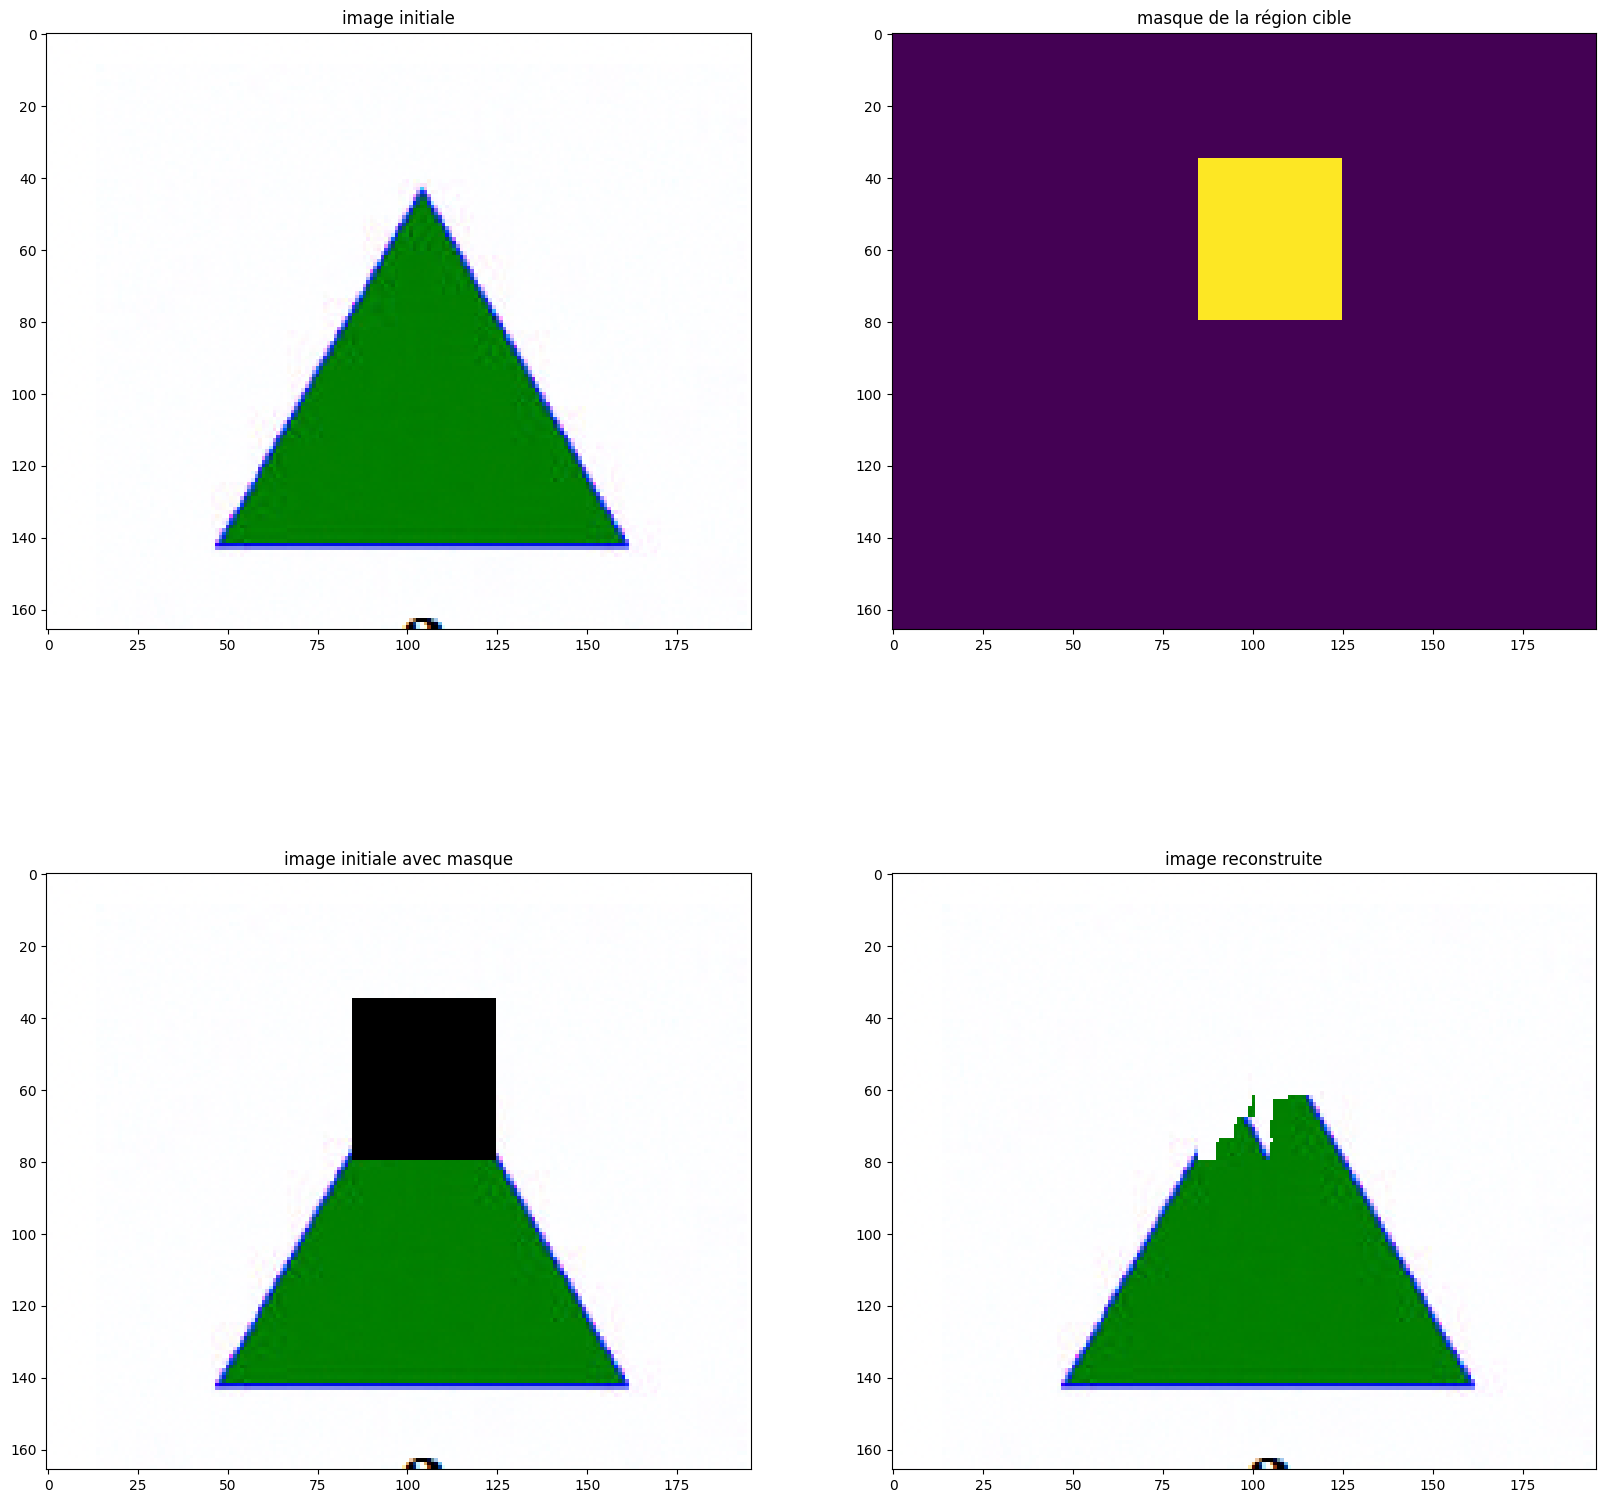

taille de l'image initiale:  (61, 61)
taille du patch : 9x9
Temps d'execution: 62.0598 secs


In [22]:
def test_triangle_mask_rectangle():
    # test image triangle
    image = Image.open("./images/image_triangle.png")
    image_matrix1 = np.array(image)
    image_matrix = image_matrix1[:,:,:3]
    
    # création du masque en forme de rectangle
    target_region_mask = np.array([[[False] for i in range(image_matrix.shape[1])] for j in range(image_matrix.shape[0])])
    target_region_mask[35:80,85:125,0] = True 


    #affiche du masque
    mask = np.array([[0 for i in range(image_matrix.shape[1])] for j in range(image_matrix.shape[0])])
    mask[35:80,85:125] = 1
    mask_image = Image.fromarray(mask.astype(np.uint8))

    # affichage de la région cible sur l'image initiale
    image_initiale_matrix = image_matrix*(1-target_region_mask)
    image_initiale = Image.fromarray(image_initiale_matrix.astype(np.uint8))


    # Execution de la méthode d'inpainting
    start_time = time.time()
    test = pc.patch_search_compatible(target_region_mask, image_matrix, 9)
    end_time = time.time()

    test_image =Image.fromarray(test)
    

    fig,ax = plt.subplots(2, 2, figsize=(20,20))
    imgs = [image, mask_image,image_initiale, test_image]
    names = ["image initiale", "masque de la région cible","image initiale avec masque", "image reconstruite"]

    for i in range(4):
        if i ==2:
            ax[i//2,i%2].set_title(names[i])
            ax[i//2,i%2].imshow(imgs[i], cmap="gray")
        else:
            ax[i//2,i%2].set_title(names[i])
            ax[i//2,i%2].imshow(imgs[i])

    plt.show()

    print("taille de l'image initiale: ",gray_image_matrix.shape)
    print("taille du patch : 9x9")
    print(f"Temps d'execution: {end_time - start_time:.4f} secs")

    return True

val_triangle_mask_rectangle = test_triangle_mask_rectangle()

Utilisation d'un masque en forme de cercle

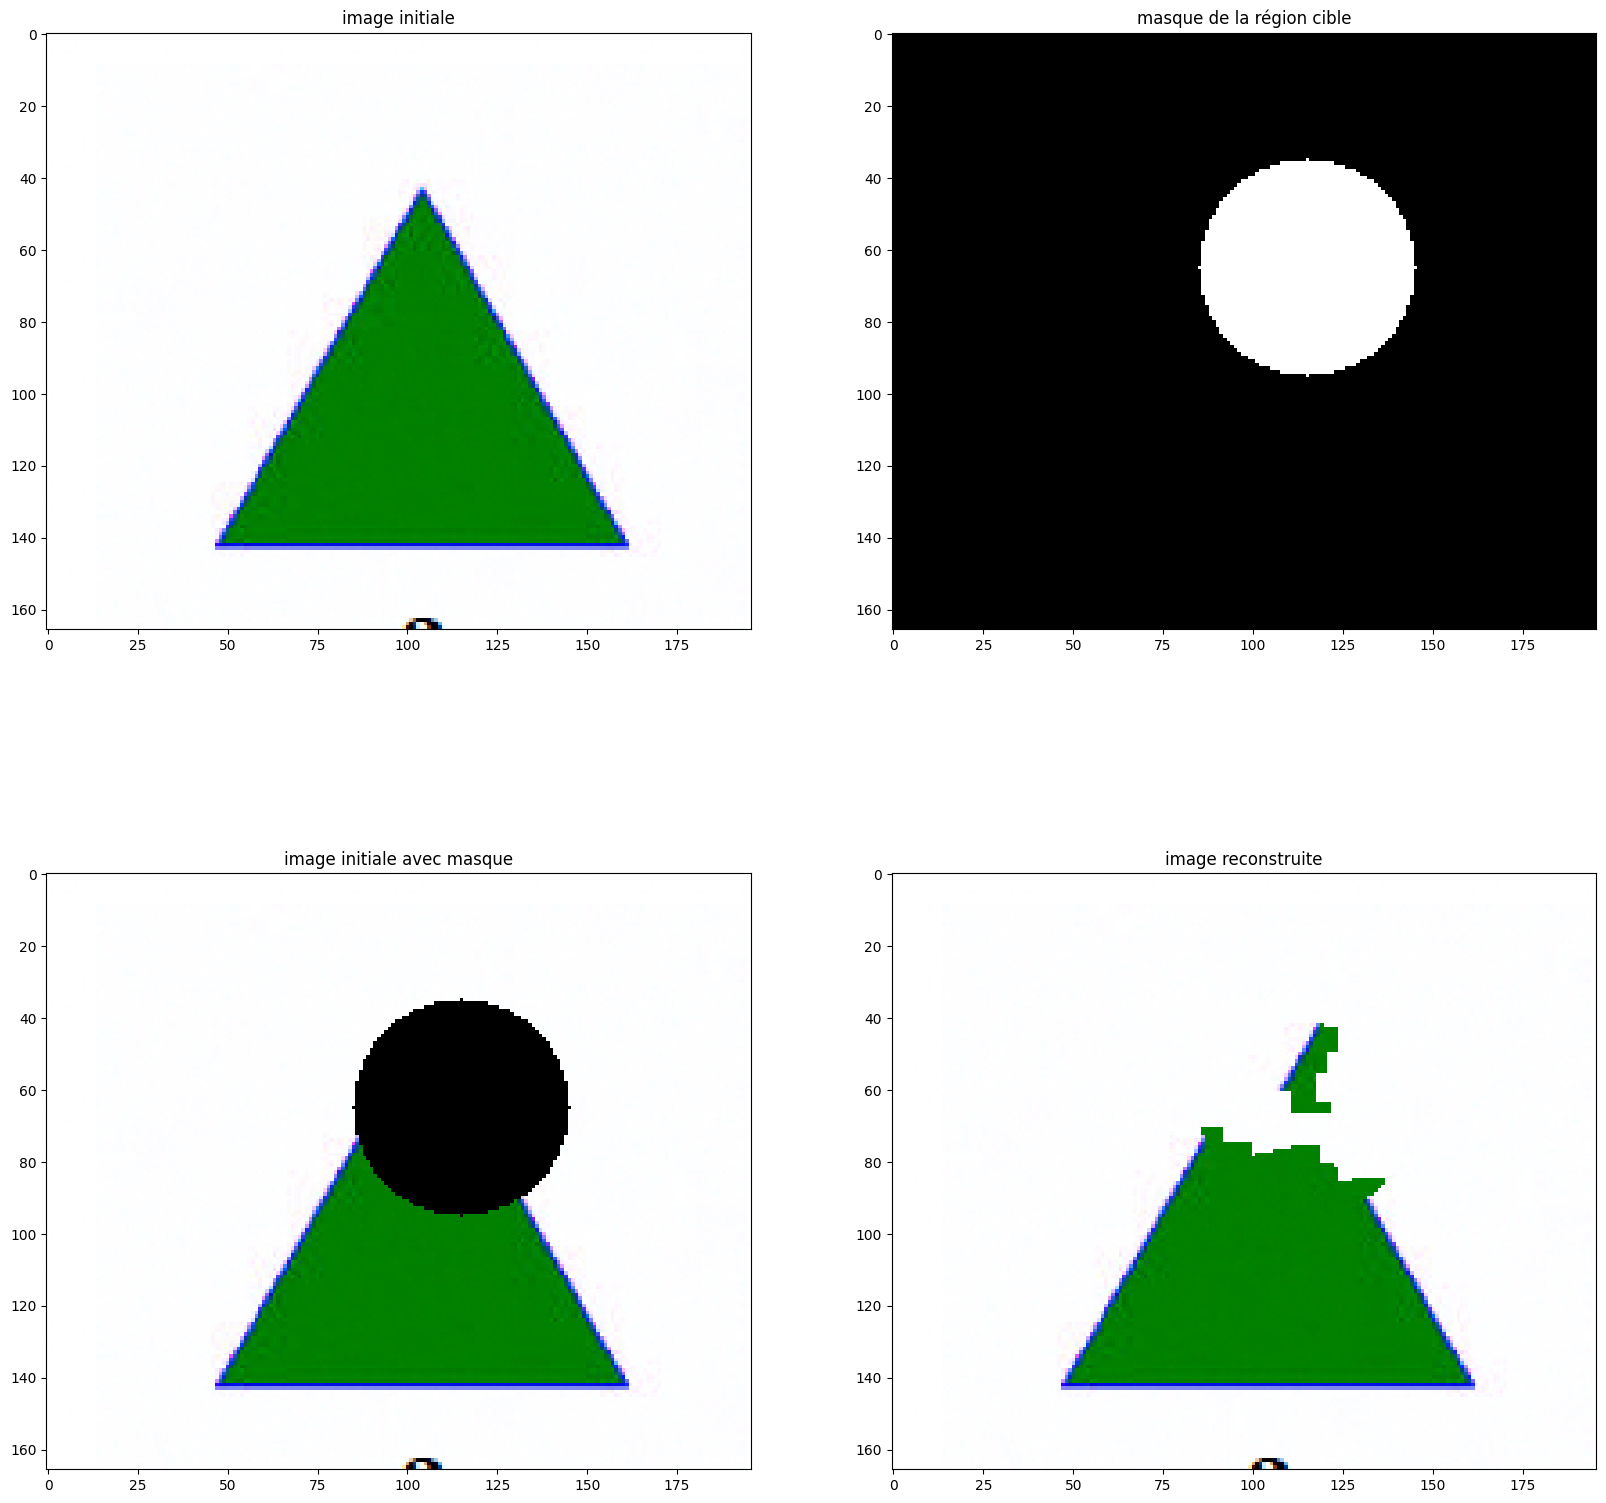

taille de l'image initiale:  (61, 61)
taille du patch : 9x9
Temps d'execution: 95.0773 secs


In [15]:
def test_triangle_mask_disk():
    # test image triangle
    image = Image.open("./images/image_triangle.png")
    image_matrix1 = np.array(image)
    image_matrix = image_matrix1[:,:,:3]
    
    # création du masque en forme de disque
    disk = morpho.disk(30)
    target_region_mask = np.array([[[False] for i in range(image_matrix.shape[1])] for j in range(image_matrix.shape[0])])
    target_region_mask[35:96,85:146,0] = disk


    #affiche du masque
    mask = np.array([[0 for i in range(image_matrix.shape[1])] for j in range(image_matrix.shape[0])])
    mask[35:96,85:146] = disk
    mask_image = Image.fromarray(mask.astype(np.uint8))

    # affichage de la région cible sur l'image initiale
    image_initiale_matrix = image_matrix*(1-target_region_mask)
    image_initiale = Image.fromarray(image_initiale_matrix.astype(np.uint8))


    # Execution de la méthode d'inpainting
    start_time = time.time()
    test = pc.patch_search_compatible(target_region_mask, image_matrix, 9)
    end_time = time.time()

    test_image =Image.fromarray(test)
    

    fig,ax = plt.subplots(2, 2, figsize=(20,20))
    imgs = [image, mask_image,image_initiale, test_image]
    names = ["image initiale", "masque de la région cible","image initiale avec masque", "image reconstruite"]

    for i in range(4):
        if i ==1:
            ax[i//2,i%2].set_title(names[i])
            ax[i//2,i%2].imshow(imgs[i], cmap="gray")
        else:
            ax[i//2,i%2].set_title(names[i])
            ax[i//2,i%2].imshow(imgs[i])
    plt.show()

    print("taille de l'image initiale: ",gray_image_matrix.shape)
    print("taille du patch : 9x9")
    print(f"Temps d'execution: {end_time - start_time:.4f} secs")

    return True

val_triangle_mask_disk = test_triangle_mask_disk()


Utilisation du masque du papier

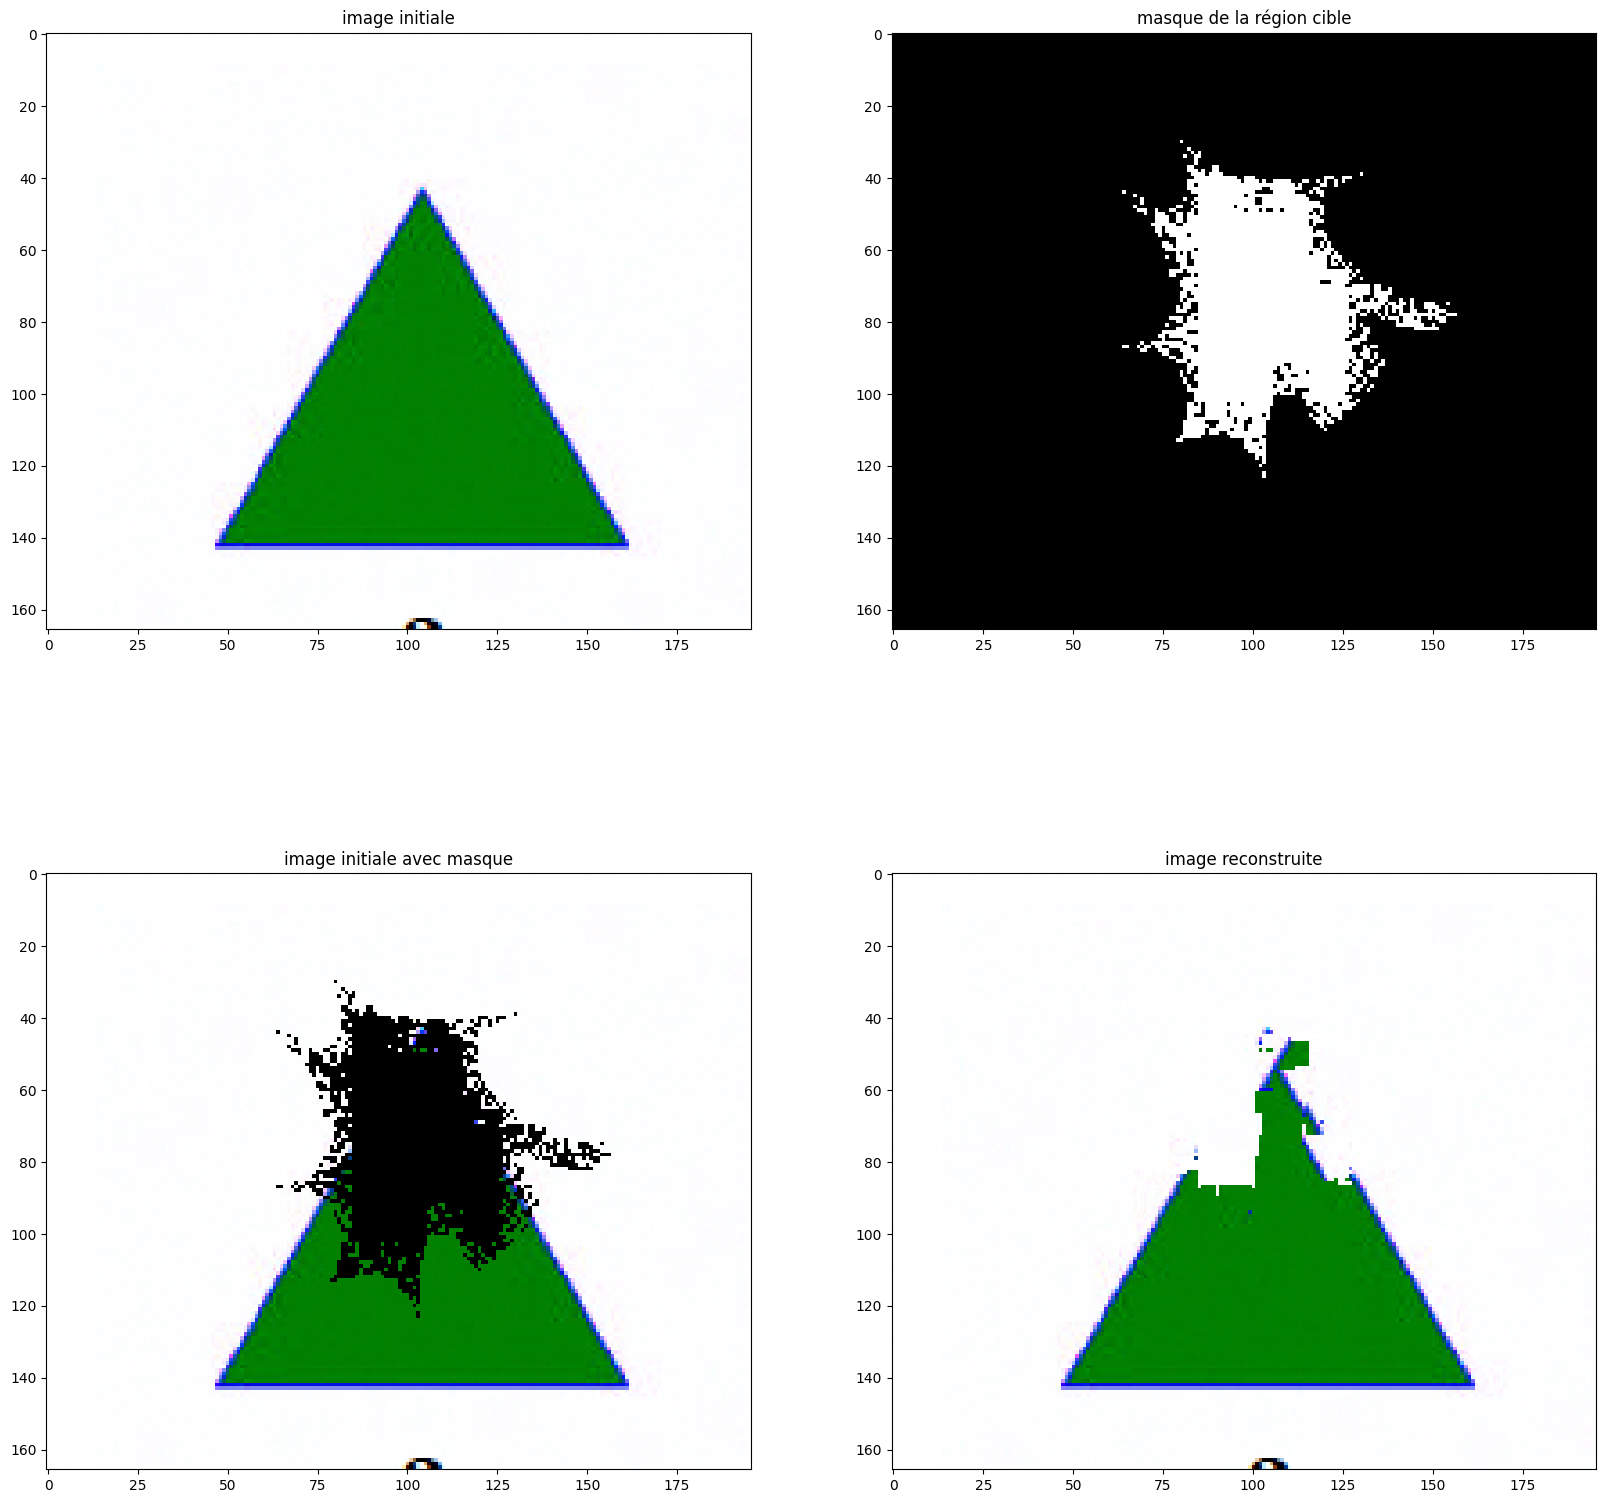

taille de l'image initiale:  (61, 61)
taille du patch : 9x9
Temps d'execution: 142.9478 secs


In [21]:
def test_triangle_mask_noise():
    # test image triangle
    image = Image.open("./images/image_triangle.png")
    image_matrix1 = np.array(image)
    image_matrix = image_matrix1[:,:,:3]
    
    # création du masque à partir de l'image dans le papier
    mask = Image.open("./images/mask_triangle.png")
    mask_matrix1 = np.array(mask)
    mask_matrix=mask_matrix1[:,:,:3]
    mask_matrix_size = mask_matrix.shape
    target_region_mask = np.array([[[False] for i in range(mask_matrix_size[1])] for j in range(mask_matrix_size[0])])
    for i in range(mask_matrix_size[0]):
        for j in range(mask_matrix_size[1]):
            if np.all(mask_matrix[i,j] < np.array([5,5,5])):
                target_region_mask[i,j,0] = True
    


    #affiche du masque
    mask = np.array([[0 for i in range(image_matrix.shape[1])] for j in range(image_matrix.shape[0])])
    for i in range(mask_matrix_size[0]):
        for j in range(mask_matrix_size[1]):
            if np.all(mask_matrix[i,j] == np.array([0,0,0])):
                mask[i,j] = 1
    mask_image = Image.fromarray(mask.astype(np.uint8))

    # affichage de la région cible sur l'image initiale
    image_initiale_matrix = image_matrix*(1-target_region_mask)
    image_initiale = Image.fromarray(image_initiale_matrix.astype(np.uint8))


    # Execution de la méthode d'inpainting
    start_time = time.time()
    test = pc.patch_search_compatible(target_region_mask, image_matrix, 9)
    end_time = time.time()

    test_image =Image.fromarray(test)
    

    fig,ax = plt.subplots(2, 2, figsize=(20,20))
    imgs = [image, mask_image,image_initiale, test_image]
    names = ["image initiale", "masque de la région cible","image initiale avec masque", "image reconstruite"]

    for i in range(4):
        if i ==1:
            ax[i//2,i%2].set_title(names[i])
            ax[i//2,i%2].imshow(imgs[i], cmap="gray")
        else:
            ax[i//2,i%2].set_title(names[i])
            ax[i//2,i%2].imshow(imgs[i])
    plt.show()

    print("taille de l'image initiale: ",gray_image_matrix.shape)
    print("taille du patch : 9x9")
    print(f"Temps d'execution: {end_time - start_time:.4f} secs")

    return True

val_triangle_mask_paper = test_triangle_mask_noise()


Utilisation d'un masque inspiré de celui du papier mais plus grand

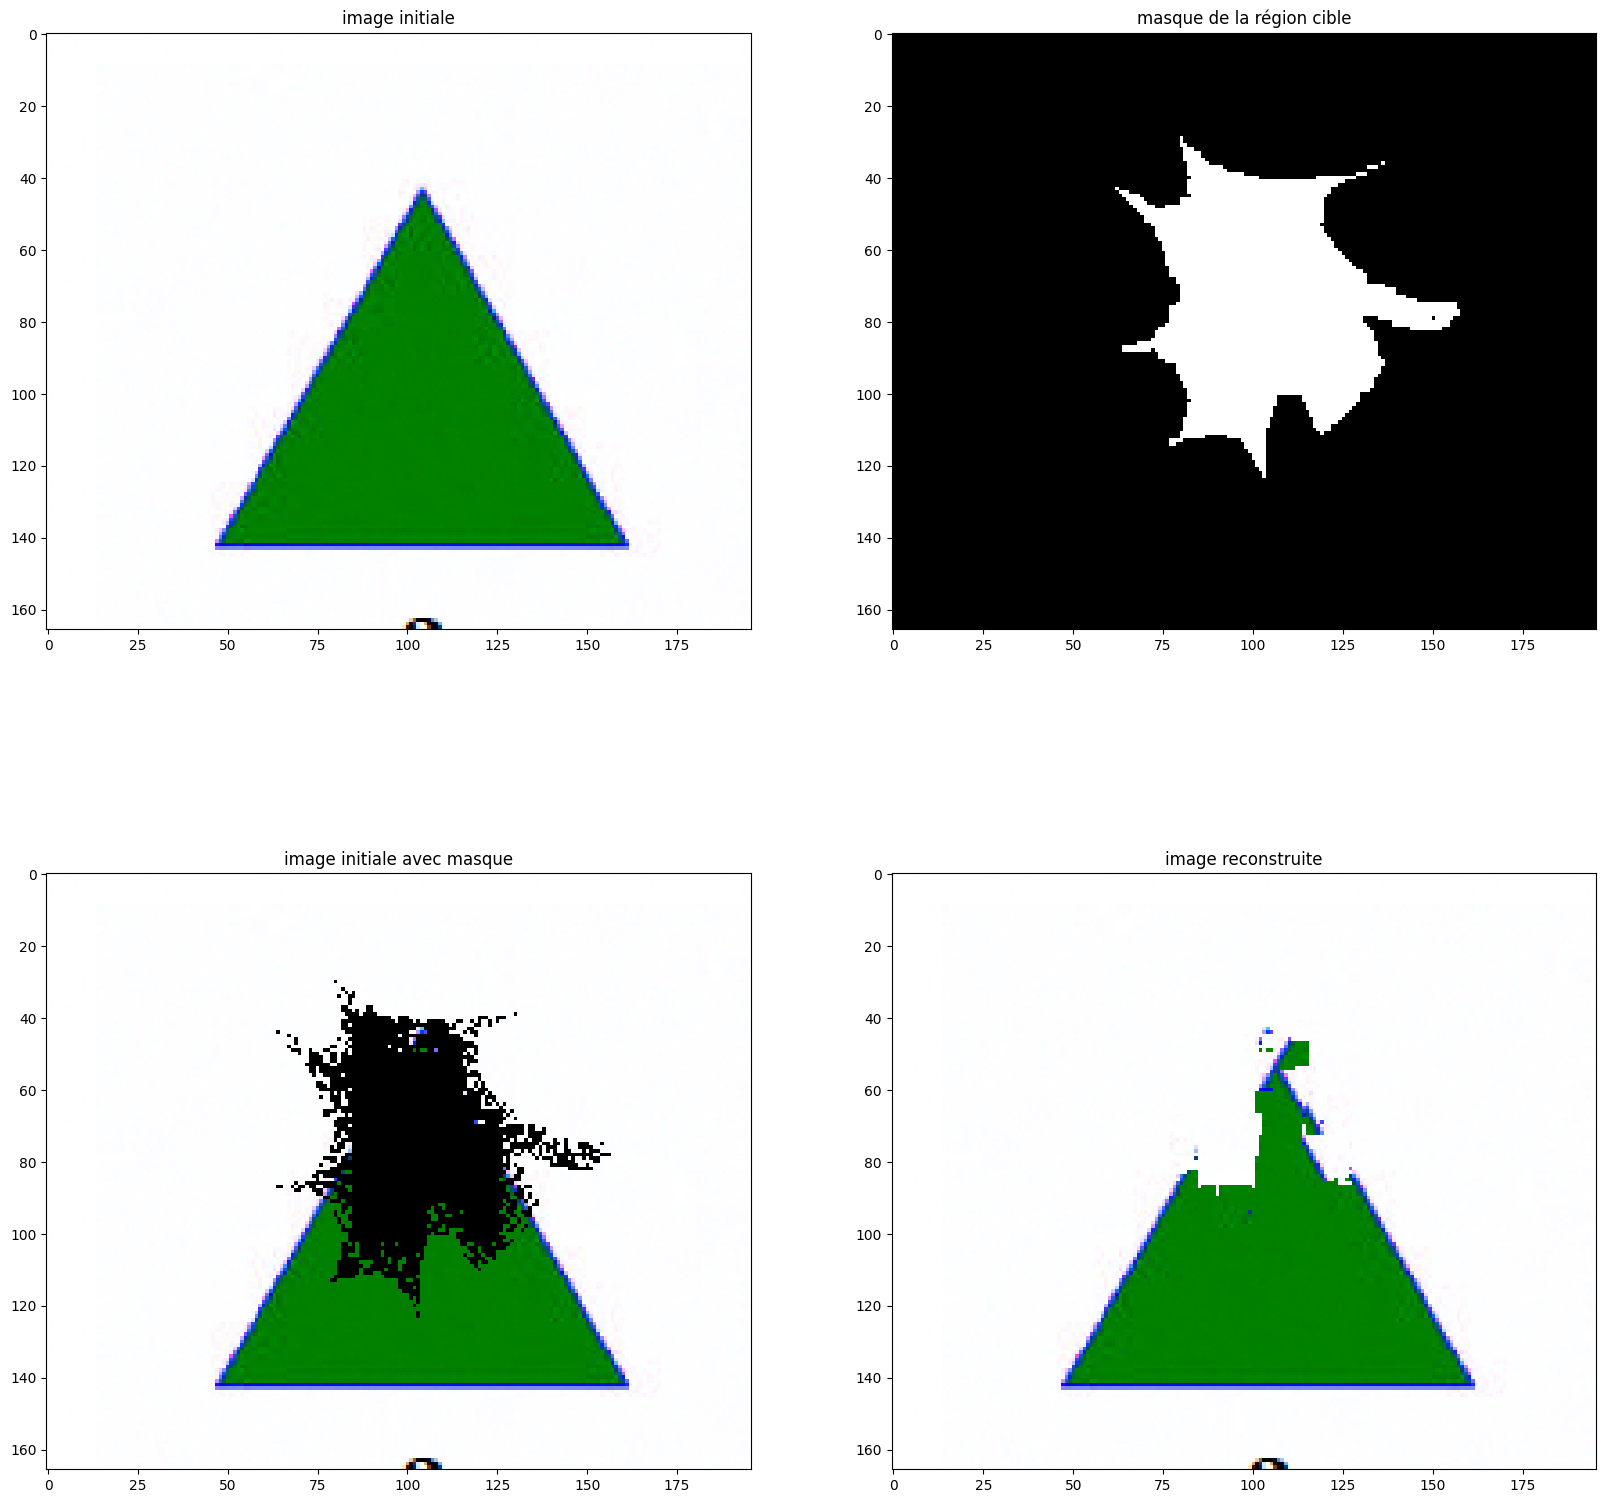

taille de l'image initiale:  (61, 61)
taille du patch : 9x9
Temps d'execution: 141.3548 secs


In [20]:
def test_triangle_mask_noise2():
    # test image triangle
    image = Image.open("./images/image_triangle.png")
    image_matrix1 = np.array(image)
    image_matrix = image_matrix1[:,:,:3]
    
    # création du masque à partir de l'image dans le papier
    mask = Image.open("./images/mask_triangle.png")
    mask_matrix1 = np.array(mask)
    mask_matrix=mask_matrix1[:,:,:3]
    mask_matrix_size = mask_matrix.shape
    target_region_mask = np.array([[[False] for i in range(mask_matrix_size[1])] for j in range(mask_matrix_size[0])])
    for i in range(mask_matrix_size[0]):
        for j in range(mask_matrix_size[1]):
            if np.all(mask_matrix[i,j] < np.array([5,5,5])):
                target_region_mask[i,j,0] = True
    


    #affiche du masque
    mask = np.array([[0 for i in range(image_matrix.shape[1])] for j in range(image_matrix.shape[0])])
    for i in range(mask_matrix_size[0]):
        for j in range(mask_matrix_size[1]):
            if np.all(mask_matrix[i,j] < np.array([30,30,30])):
                mask[i,j] = 1
    mask_image = Image.fromarray(mask.astype(np.uint8))

    # affichage de la région cible sur l'image initiale
    image_initiale_matrix = image_matrix*(1-target_region_mask)
    image_initiale = Image.fromarray(image_initiale_matrix.astype(np.uint8))


    # Execution de la méthode d'inpainting
    start_time = time.time()
    test = pc.patch_search_compatible(target_region_mask, image_matrix, 9)
    end_time = time.time()

    test_image =Image.fromarray(test)
    

    fig,ax = plt.subplots(2, 2, figsize=(20,20))
    imgs = [image, mask_image,image_initiale, test_image]
    names = ["image initiale", "masque de la région cible","image initiale avec masque", "image reconstruite"]

    for i in range(4):
        if i ==1:
            ax[i//2,i%2].set_title(names[i])
            ax[i//2,i%2].imshow(imgs[i], cmap="gray")
        else:
            ax[i//2,i%2].set_title(names[i])
            ax[i//2,i%2].imshow(imgs[i])
    plt.show()

    print("taille de l'image initiale: ",gray_image_matrix.shape)
    print("taille du patch : 9x9")
    print(f"Temps d'execution: {end_time - start_time:.4f} secs")

    return True

val_triangle_mask_paper_2 = test_triangle_mask_noise2()


### Tests sur une image de paysage de plage

Premier test : utilisartion du masque fournit dans le papier

(222, 270, 3)
(222, 270)
(222, 270)


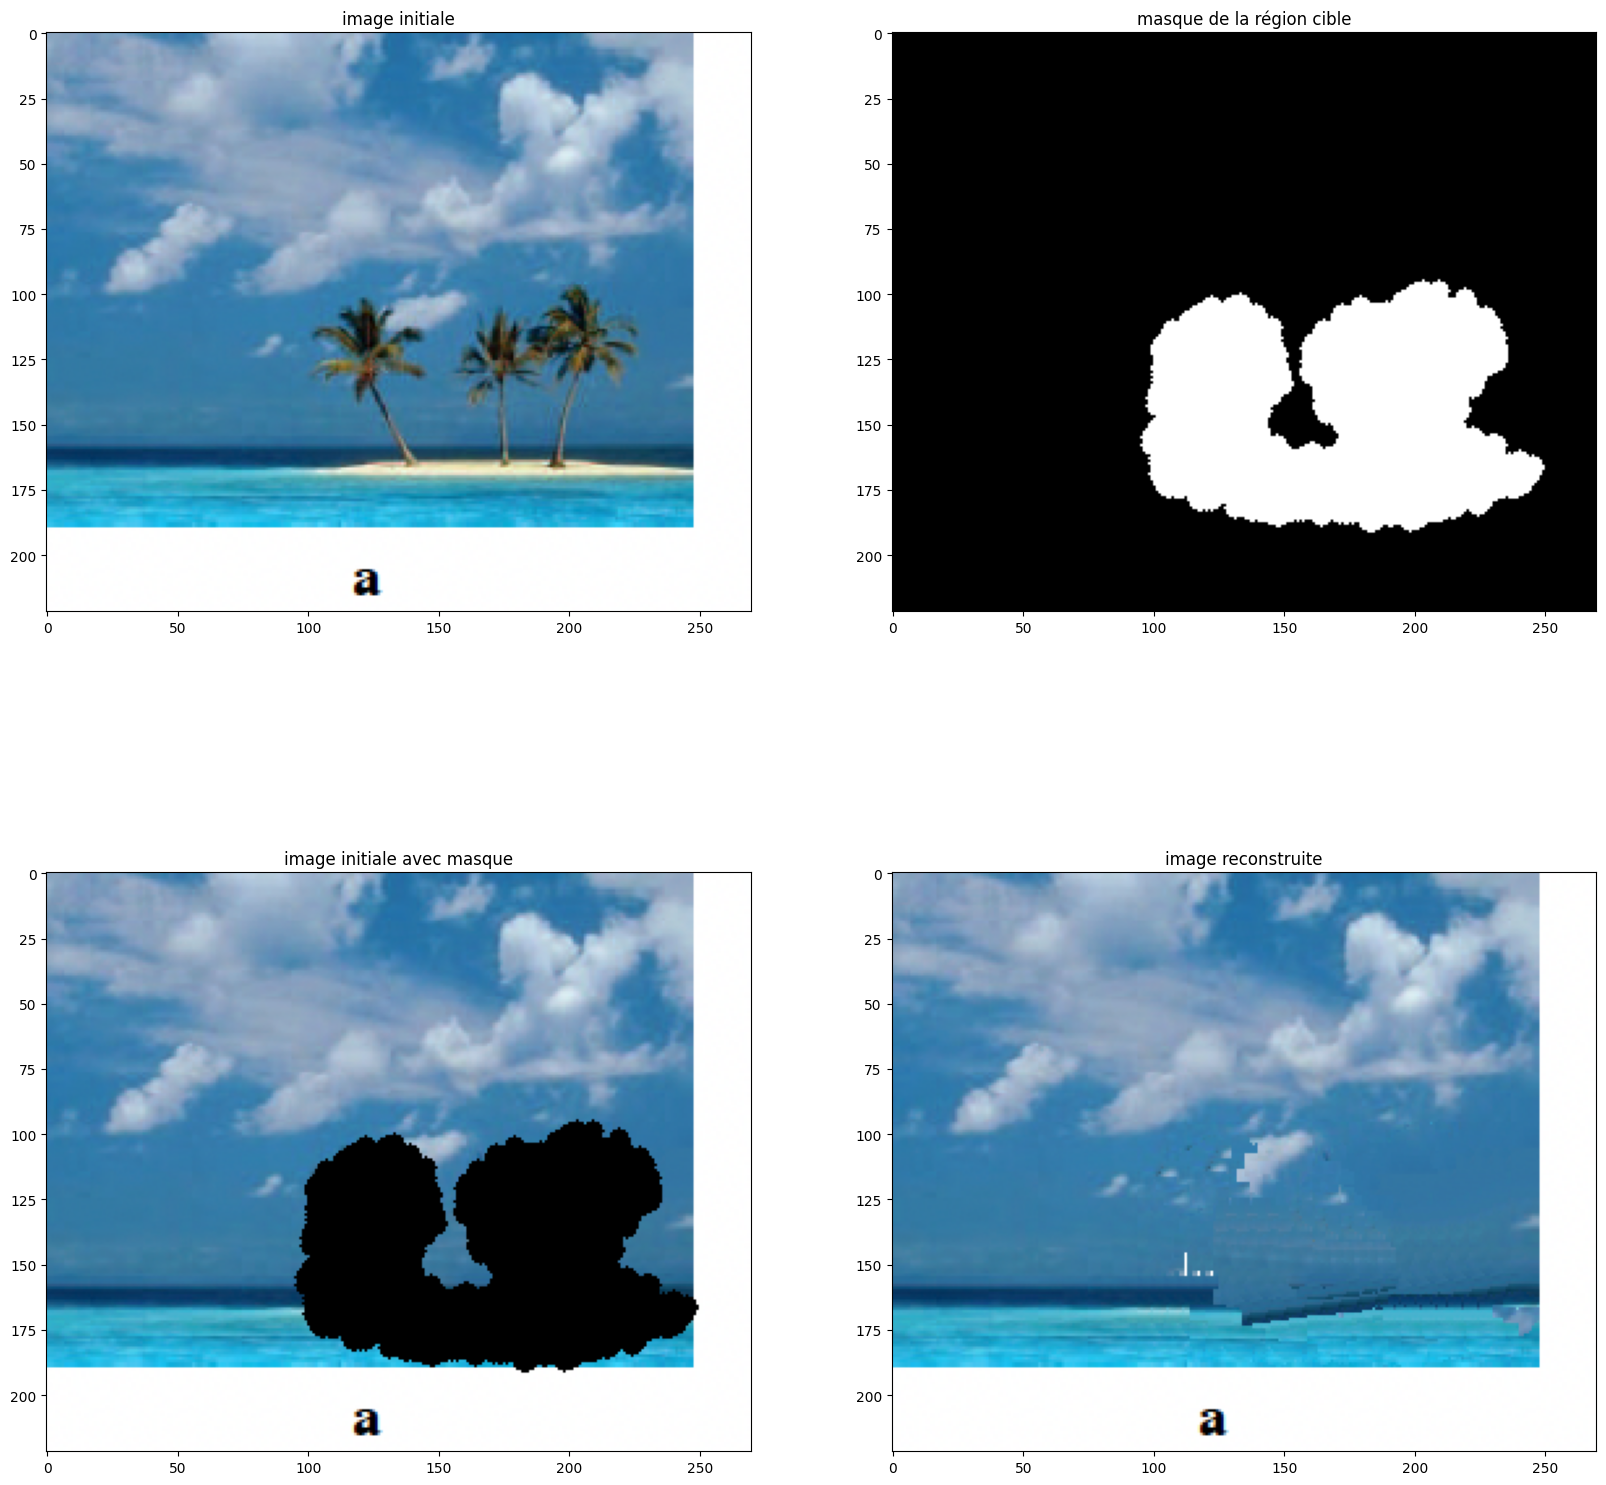

taille de l'image initiale:  (61, 61)
taille du patch : 9x9
Temps d'execution: 478.5252 secs


In [34]:
def test_beach_mask_paper():
    # test image triangle
    image = Image.open("./images/plage_et_blanc.png")
    image_matrix1 = np.array(image)
    image_matrix = image_matrix1[:,:,:3]
    
    # création du masque à partir de l'image dans le papier
    mask_origin = Image.open("./images/mask_plage_et_blanc.png")
    mask_matrix1 = np.array(mask_origin)
    mask_matrix=mask_matrix1[:,:,:3]
    mask_matrix_size = mask_matrix.shape
    target_region_mask1 = np.zeros((mask_matrix_size[0],mask_matrix_size[1]))
    print(mask_matrix_size)
    print(target_region_mask1.shape)
    for i in range(mask_matrix_size[0]):
        for j in range(mask_matrix_size[1]):
            if np.all(mask_matrix[i,j] == np.array([255,0,0])):
                target_region_mask1[i,j] = True
    strell = morpho.disk(4)
    target_region_mask2 = morpho.binary_dilation(target_region_mask1, strell)
    print(target_region_mask2.shape)
    target_region_mask = np.array([[[target_region_mask2[j,i]] for i in range(target_region_mask2.shape[1])] for j in range(target_region_mask2.shape[0])])
    


    #affiche du masque
    mask1 = np.array([[0 for i in range(image_matrix.shape[1])] for j in range(image_matrix.shape[0])])
    for i in range(mask_matrix_size[0]):
        for j in range(mask_matrix_size[1]):
            if np.all(mask_matrix[i,j] == np.array([255,0,0])) and i<mask_matrix_size[0]-9 and j<mask_matrix_size[1]-9:
                mask1[i,j] = 1
    mask = morpho.binary_dilation(mask1, strell)
    mask_image = Image.fromarray(mask.astype(np.uint8))

    # affichage de la région cible sur l'image initiale
    image_initiale_matrix = image_matrix*(1-target_region_mask)
    image_initiale = Image.fromarray(image_initiale_matrix.astype(np.uint8))


    # Execution de la méthode d'inpainting
    start_time = time.time()
    test = pc.patch_search_compatible(target_region_mask, image_matrix, 9)
    end_time = time.time()

    test_image =Image.fromarray(test)
    

    fig,ax = plt.subplots(2, 2, figsize=(20,20))
    imgs = [image, mask_image,image_initiale, test_image]
    names = ["image initiale", "masque de la région cible","image initiale avec masque", "image reconstruite"]

    for i in range(4):
        if i ==1:
            ax[i//2,i%2].set_title(names[i])
            ax[i//2,i%2].imshow(imgs[i], cmap="gray")
        else:
            ax[i//2,i%2].set_title(names[i])
            ax[i//2,i%2].imshow(imgs[i])
    plt.show()

    print("taille de l'image initiale: ",gray_image_matrix.shape)
    print("taille du patch : 9x9")
    print(f"Temps d'execution: {end_time - start_time:.4f} secs")

    return True

val_mask_paper = test_beach_mask_paper()

Deuxième test : masque en forme de rectangle

In [ ]:
def test_beach_mask_paper_3x3():
    # test image triangle
    image = Image.open("./images/plage_et_blanc.png")
    image_matrix1 = np.array(image)
    image_matrix = image_matrix1[:,:,:3]
    
    # création du masque à partir de l'image dans le papier
    mask_origin = Image.open("./images/mask_plage_et_blanc.png")
    mask_matrix1 = np.array(mask_origin)
    mask_matrix=mask_matrix1[:,:,:3]
    mask_matrix_size = mask_matrix.shape
    target_region_mask1 = np.zeros((mask_matrix_size[0],mask_matrix_size[1]))
    print(mask_matrix_size)
    print(target_region_mask1.shape)
    for i in range(mask_matrix_size[0]):
        for j in range(mask_matrix_size[1]):
            if np.all(mask_matrix[i,j] == np.array([255,0,0])):
                target_region_mask1[i,j] = True
    strell = morpho.disk(4)
    target_region_mask2 = morpho.binary_dilation(target_region_mask1, strell)
    print(target_region_mask2.shape)
    target_region_mask = np.array([[[target_region_mask2[j,i]] for i in range(target_region_mask2.shape[1])] for j in range(target_region_mask2.shape[0])])
    


    #affiche du masque
    mask1 = np.array([[0 for i in range(image_matrix.shape[1])] for j in range(image_matrix.shape[0])])
    for i in range(mask_matrix_size[0]):
        for j in range(mask_matrix_size[1]):
            if np.all(mask_matrix[i,j] == np.array([255,0,0])) and i<mask_matrix_size[0]-9 and j<mask_matrix_size[1]-9:
                mask1[i,j] = 1
    mask = morpho.binary_dilation(mask1, strell)
    mask_image = Image.fromarray(mask.astype(np.uint8))

    # affichage de la région cible sur l'image initiale
    image_initiale_matrix = image_matrix*(1-target_region_mask)
    image_initiale = Image.fromarray(image_initiale_matrix.astype(np.uint8))


    # Execution de la méthode d'inpainting
    start_time = time.time()
    test = pc.patch_search_compatible(target_region_mask, image_matrix, 3)
    end_time = time.time()

    test_image =Image.fromarray(test)
    

    fig,ax = plt.subplots(2, 2, figsize=(20,20))
    imgs = [image, mask_image,image_initiale, test_image]
    names = ["image initiale", "masque de la région cible","image initiale avec masque", "image reconstruite"]

    for i in range(4):
        if i ==1:
            ax[i//2,i%2].set_title(names[i])
            ax[i//2,i%2].imshow(imgs[i], cmap="gray")
        else:
            ax[i//2,i%2].set_title(names[i])
            ax[i//2,i%2].imshow(imgs[i])
    plt.show()

    print("taille de l'image initiale: ",gray_image_matrix.shape)
    print("taille du patch : 3x3")
    print(f"Temps d'execution: {end_time - start_time:.4f} secs")

    return True

val_mask_paper_3x3 = test_beach_mask_paper_3x3()

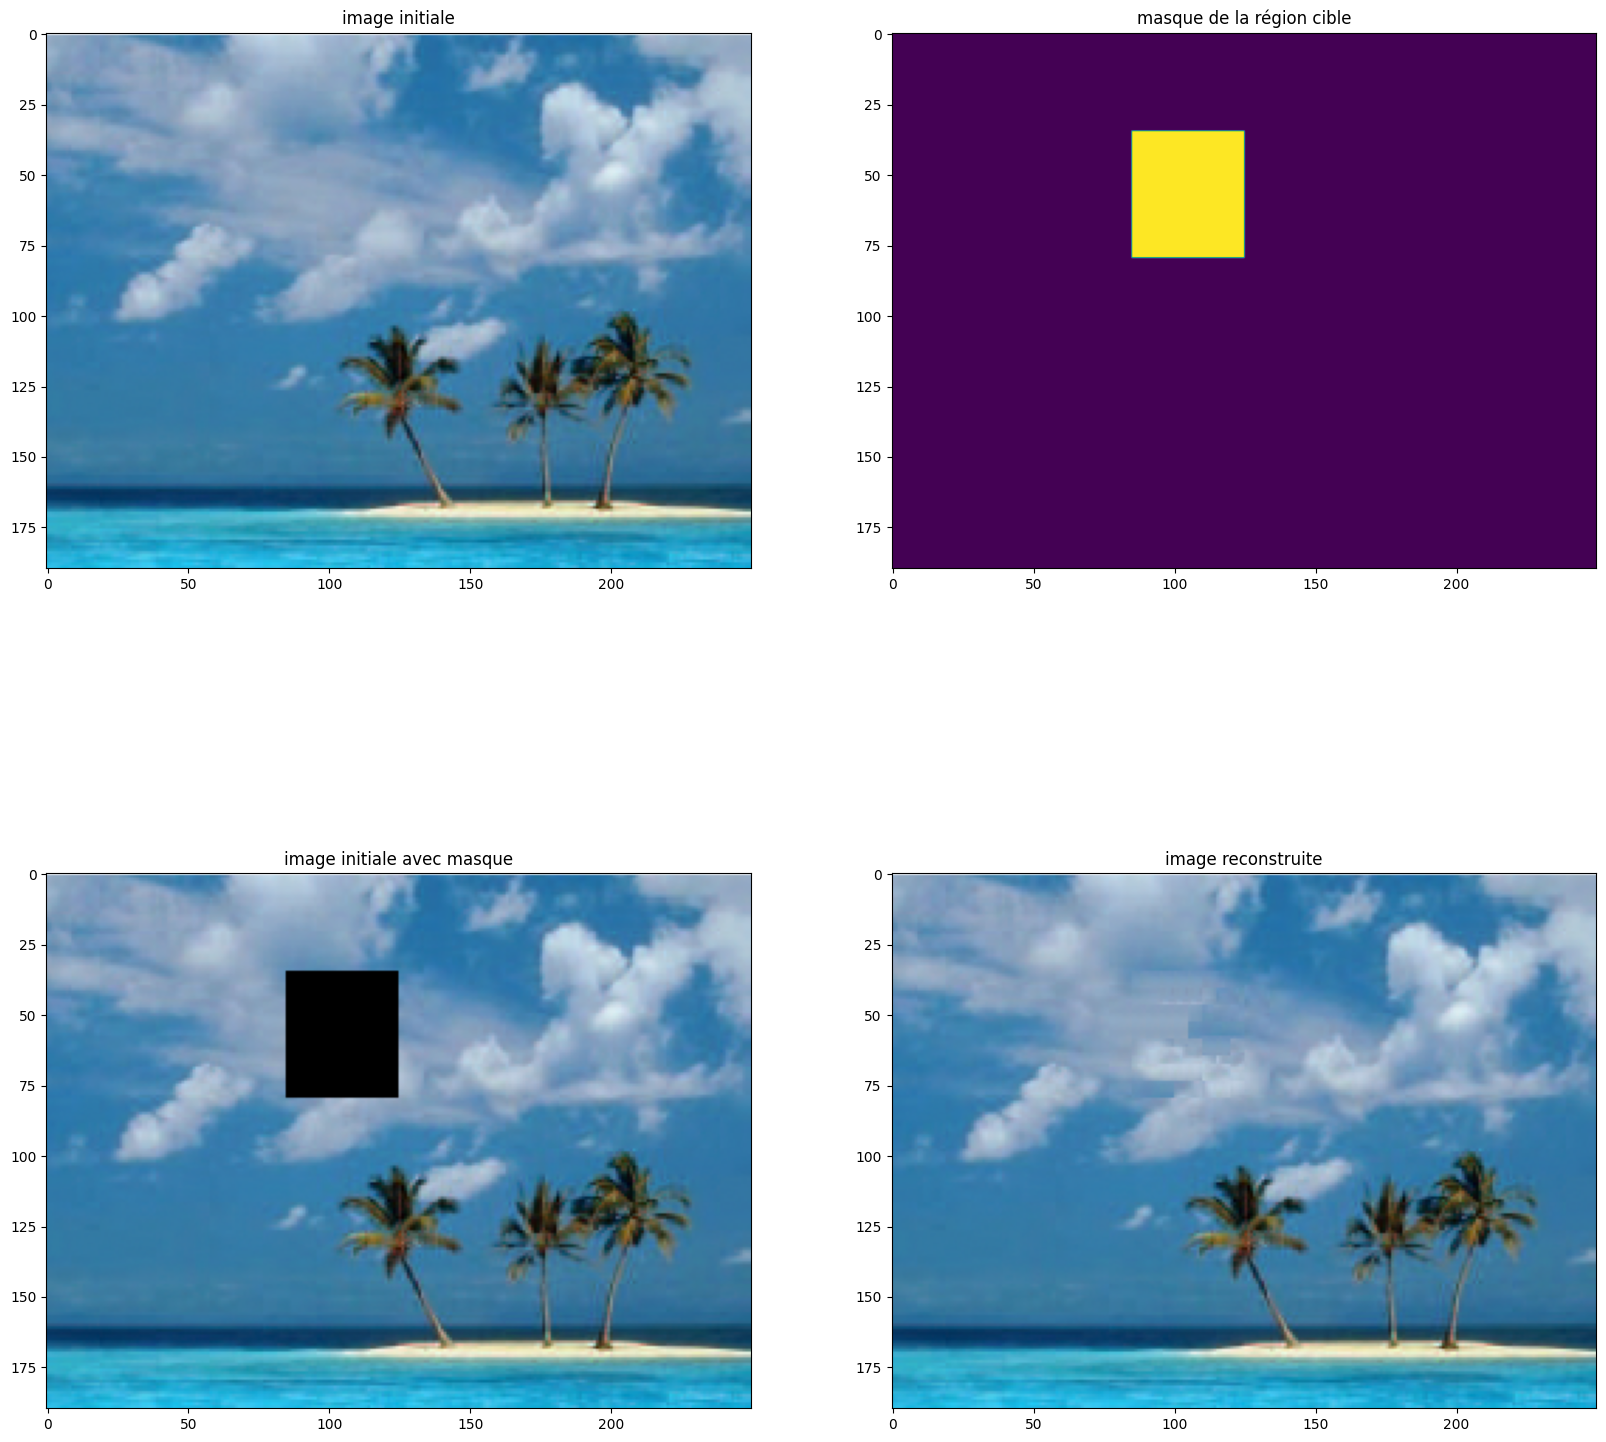

taille de l'image initiale:  (61, 61)
taille du patch : 9x9
Temps d'execution: 65.4499 secs


In [38]:


def test_mask_rectangle():
    # test image triangle
    image = Image.open("./images/plage.png")
    image_matrix1 = np.array(image)
    image_matrix = image_matrix1[:,:,:3]
    
    # création du masque en forme de rectangle
    target_region_mask = np.array([[[False] for i in range(image_matrix.shape[1])] for j in range(image_matrix.shape[0])])
    target_region_mask[35:80,85:125,0] = True 


    #affiche du masque
    mask = np.array([[0 for i in range(image_matrix.shape[1])] for j in range(image_matrix.shape[0])])
    mask[35:80,85:125] = 1
    mask_image = Image.fromarray(mask.astype(np.uint8))

    # affichage de la région cible sur l'image initiale
    image_initiale_matrix = image_matrix*(1-target_region_mask)
    image_initiale = Image.fromarray(image_initiale_matrix.astype(np.uint8))


    # Execution de la méthode d'inpainting
    start_time = time.time()
    test = pc.patch_search_compatible(target_region_mask, image_matrix, 9)
    end_time = time.time()

    test_image =Image.fromarray(test)
    

    fig,ax = plt.subplots(2, 2, figsize=(20,20))
    imgs = [image, mask_image,image_initiale, test_image]
    names = ["image initiale", "masque de la région cible","image initiale avec masque", "image reconstruite"]

    for i in range(4):
        if i ==1:
            ax[i//2,i%2].set_title(names[i])
            ax[i//2,i%2].imshow(imgs[i], cmap="gray")
        else:
            ax[i//2,i%2].set_title(names[i])
            ax[i//2,i%2].imshow(imgs[i])

    plt.show()

    print("taille de l'image initiale: ",image_matrix.shape)
    print("taille du patch : 9x9")
    print(f"Temps d'execution: {end_time - start_time:.4f} secs")

    return True

val_rectangle = test_mask_rectangle()

(222, 270)


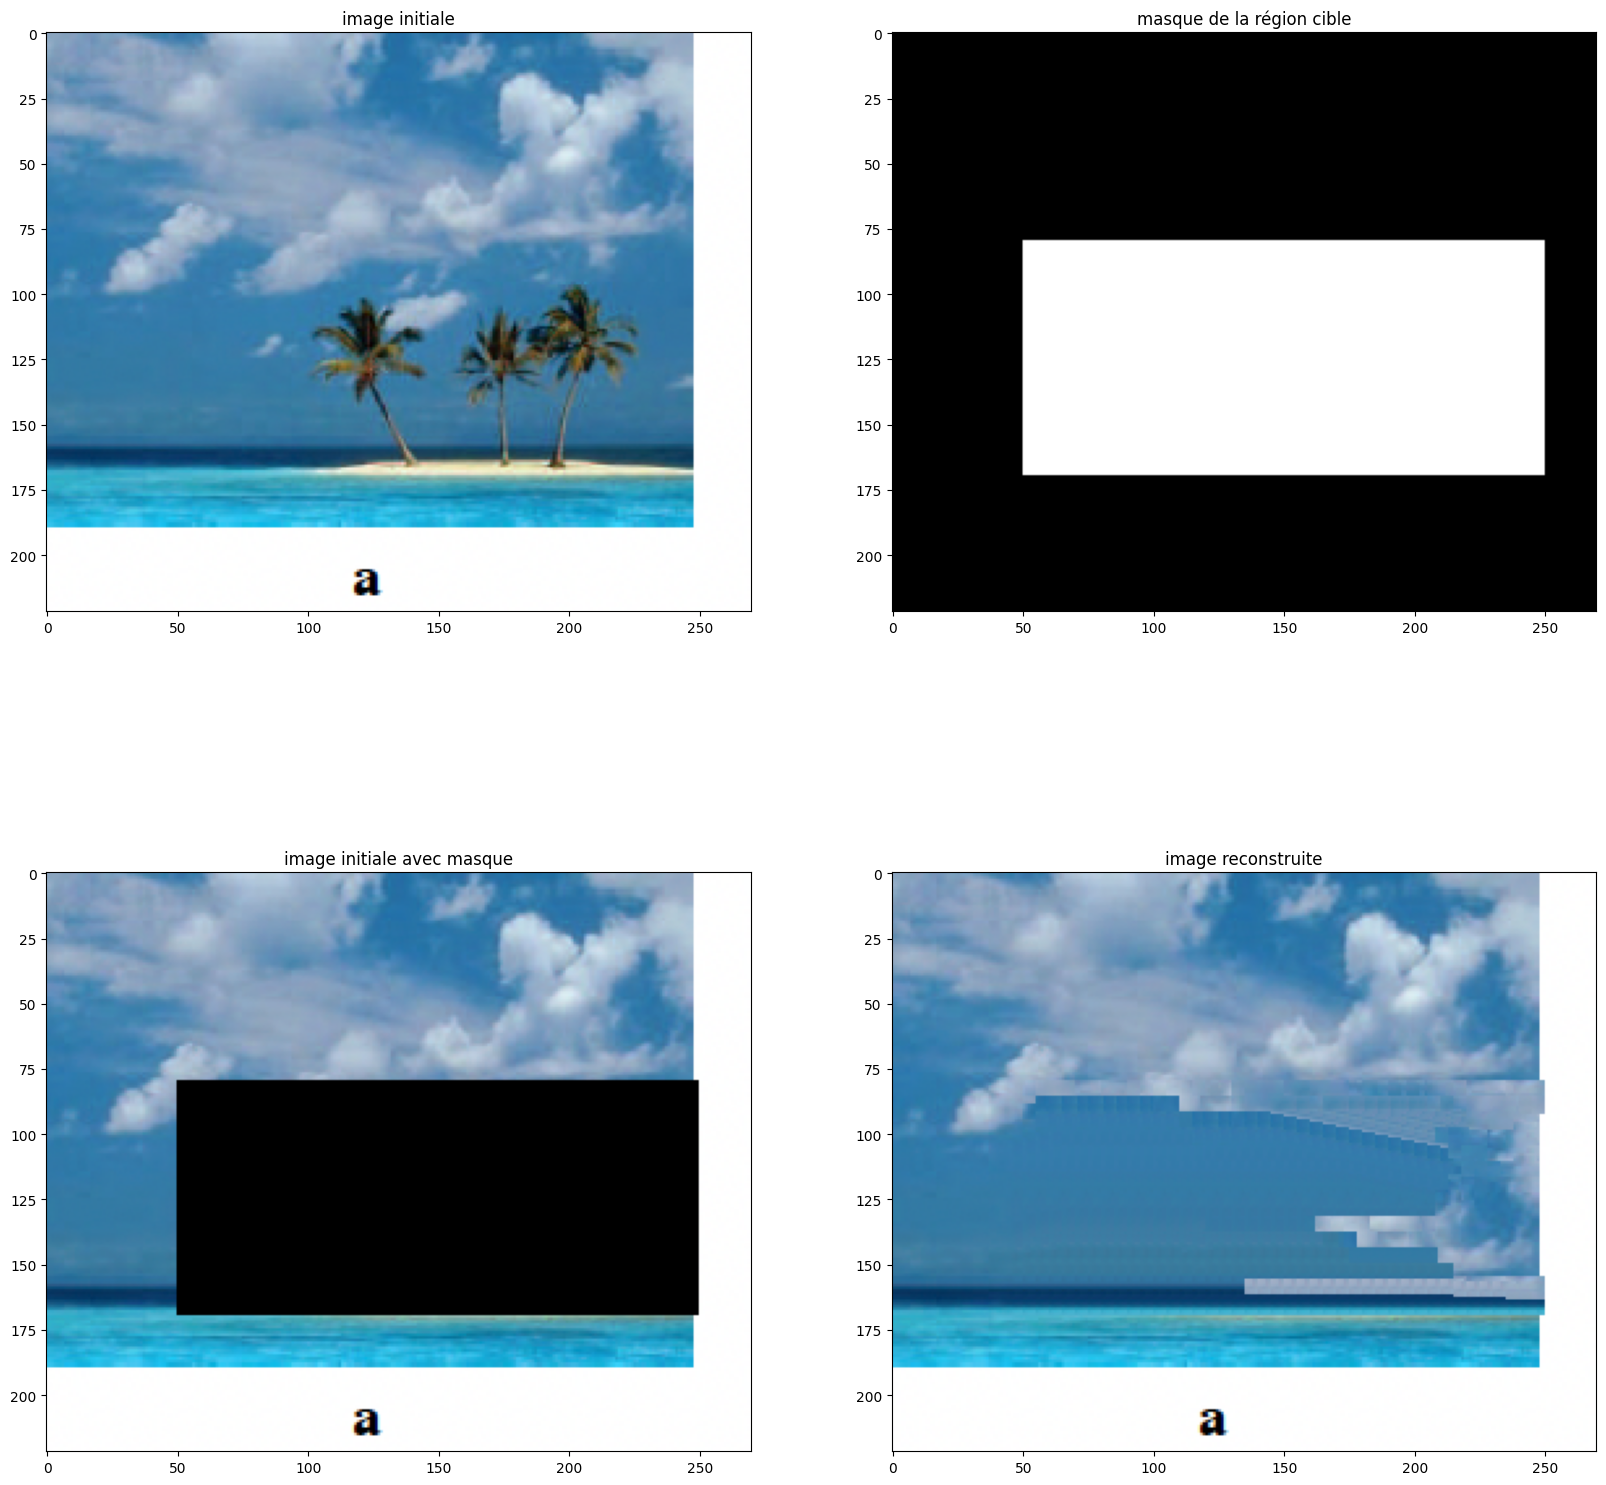

taille de l'image initiale:  (61, 61)
taille du patch : 9x9
Temps d'execution: 770.9562 secs


In [50]:
def test_mask_rectangle():
    # test image triangle
    image = Image.open("./images/plage_et_blanc.png")
    image_matrix1 = np.array(image)
    image_matrix = image_matrix1[:,:,:3]
    
    # création du masque en forme de rectangle
    target_region_mask = np.array([[[False] for i in range(image_matrix.shape[1])] for j in range(image_matrix.shape[0])])
    target_region_mask[80:170,50:250,0] = True 


    #affiche du masque
    mask = np.array([[0 for i in range(image_matrix.shape[1])] for j in range(image_matrix.shape[0])])

    mask[80:170,50:250] = 1
    print(mask.shape)
    
    mask_image = Image.fromarray(mask.astype(np.uint8)*255)
    mask_image.show()

    # affichage de la région cible sur l'image initiale
    image_initiale_matrix = image_matrix*(1-target_region_mask)
    image_initiale = Image.fromarray(image_initiale_matrix.astype(np.uint8))


    # Execution de la méthode d'inpainting
    start_time = time.time()
    test = pc.patch_search_compatible(target_region_mask, image_matrix, 9)
    end_time = time.time()

    test_image =Image.fromarray(test)
    

    fig,ax = plt.subplots(2, 2, figsize=(20,20))
    imgs = [image, mask_image,image_initiale, test_image]
    names = ["image initiale", "masque de la région cible","image initiale avec masque", "image reconstruite"]

    for i in range(4):
        if i ==1:
            ax[i//2,i%2].set_title(names[i])
            ax[i//2,i%2].imshow(imgs[i], cmap="gray")
        else:
            ax[i//2,i%2].set_title(names[i])
            ax[i//2,i%2].imshow(imgs[i])

    plt.show()

    print("taille de l'image initiale: ",gray_image_matrix.shape)
    print("taille du patch : 9x9")
    print(f"Temps d'execution: {end_time - start_time:.4f} secs")

    return True

val_rectangle = test_mask_rectangle()

### Tests sur une image de texture

Premier test : On utilise le même masque que dans le papier avec un patch de taille 9x9

In [ ]:
def test_texture_mask_paper():
    # test image triangle
    image = Image.open("./images/texture.png")
    image_matrix1 = np.array(image)
    image_matrix = image_matrix1[:,:,:3]
    
    # création du masque à partir de l'image dans le papier
    mask_origin = Image.open("./images/mask_texture.png")
    mask_matrix1 = np.array(mask_origin)
    mask_matrix=mask_matrix1[:,:,:3]
    mask_matrix_size = mask_matrix.shape
    target_region_mask = np.array([[[False] for i in range(mask_matrix_size[1])] for j in range(mask_matrix_size[0])])
    for i in range(mask_matrix_size[0]):
        for j in range(mask_matrix_size[1]):
            if np.all(mask_matrix[i,j] == np.array([255,0,0])):
                target_region_mask[i,j,0] = True
    


    #affiche du masque
    mask = np.array([[0 for i in range(image_matrix.shape[1])] for j in range(image_matrix.shape[0])])
    for i in range(mask_matrix_size[0]):
        for j in range(mask_matrix_size[1]):
            if np.all(mask_matrix[i,j] == np.array([255,0,0])):
                mask[i,j] = 1
    mask_image = Image.fromarray(mask.astype(np.uint8))

    # affichage de la région cible sur l'image initiale
    image_initiale_matrix = image_matrix*(1-target_region_mask)
    image_initiale = Image.fromarray(image_initiale_matrix.astype(np.uint8))


    # Execution de la méthode d'inpainting
    start_time = time.time()
    test = pc.patch_search_compatible(target_region_mask, image_matrix, 9)
    end_time = time.time()

    test_image =Image.fromarray(test)
    

    fig,ax = plt.subplots(2, 2, figsize=(20,20))
    imgs = [image, mask_image,image_initiale, test_image]
    names = ["image initiale", "masque de la région cible","image initiale avec masque", "image reconstruite"]

    for i in range(4):
        if i ==1:
            ax[i//2,i%2].set_title(names[i])
            ax[i//2,i%2].imshow(imgs[i], cmap="gray")
        else:
            ax[i//2,i%2].set_title(names[i])
            ax[i//2,i%2].imshow(imgs[i])
    plt.show()

    print("taille de l'image initiale: ",gray_image_matrix.shape)
    print("taille du patch : 9x9")
    print(f"Temps d'execution: {end_time - start_time:.4f} secs")

    return True

val_texture_mask_paper = test_texture_mask_paper()

Deuxième test : On utilise le même masque que dans le papier mais avec des patchs de taille 3x3

In [ ]:
def test_texture_mask_paper_3x3():
    # test image triangle
    image = Image.open("./images/texture.png")
    image_matrix1 = np.array(image)
    image_matrix = image_matrix1[:,:,:3]
    
    # création du masque à partir de l'image dans le papier
    mask_origin = Image.open("./images/mask_texture.png")
    mask_matrix1 = np.array(mask_origin)
    mask_matrix=mask_matrix1[:,:,:3]
    mask_matrix_size = mask_matrix.shape
    target_region_mask = np.array([[[False] for i in range(mask_matrix_size[1])] for j in range(mask_matrix_size[0])])
    for i in range(mask_matrix_size[0]):
        for j in range(mask_matrix_size[1]):
            if np.all(mask_matrix[i,j] == np.array([255,0,0])):
                target_region_mask[i,j,0] = True
    


    #affiche du masque
    mask = np.array([[0 for i in range(image_matrix.shape[1])] for j in range(image_matrix.shape[0])])
    for i in range(mask_matrix_size[0]):
        for j in range(mask_matrix_size[1]):
            if np.all(mask_matrix[i,j] == np.array([255,0,0])):
                mask[i,j] = 1
    mask_image = Image.fromarray(mask.astype(np.uint8))

    # affichage de la région cible sur l'image initiale
    image_initiale_matrix = image_matrix*(1-target_region_mask)
    image_initiale = Image.fromarray(image_initiale_matrix.astype(np.uint8))


    # Execution de la méthode d'inpainting
    start_time = time.time()
    test = pc.patch_search_compatible(target_region_mask, image_matrix, 3)
    end_time = time.time()

    test_image =Image.fromarray(test)
    

    fig,ax = plt.subplots(2, 2, figsize=(20,20))
    imgs = [image, mask_image,image_initiale, test_image]
    names = ["image initiale", "masque de la région cible","image initiale avec masque", "image reconstruite"]

    for i in range(4):
        if i ==1:
            ax[i//2,i%2].set_title(names[i])
            ax[i//2,i%2].imshow(imgs[i], cmap="gray")
        else:
            ax[i//2,i%2].set_title(names[i])
            ax[i//2,i%2].imshow(imgs[i])
    plt.show()

    print("taille de l'image initiale: ",gray_image_matrix.shape)
    print("taille du patch : 3x3")
    print(f"Temps d'execution: {end_time - start_time:.4f} secs")

    return True

val_texture_mask_paper = test_texture_mask_paper_3x3()

### Tests sur une image plus complexe avec pour but de reconstituer un panneau

Premier test : Utilisation du masque du papier

In [ ]:
def test_panneau_mask_paper():
    # test image triangle
    image = Image.open("./images/panneau.png")
    image_matrix1 = np.array(image)
    image_matrix = image_matrix1[:,:,:3]
    
    # création du masque à partir de l'image dans le papier
    mask_origin = Image.open("./images/mask_panneau.png")
    mask_matrix1 = np.array(mask_origin)
    mask_matrix=mask_matrix1[:,:,:3]
    mask_matrix_size = mask_matrix.shape
    target_region_mask = np.array([[[False] for i in range(mask_matrix_size[1])] for j in range(mask_matrix_size[0])])
    for i in range(9,mask_matrix_size[0]-9):
        for j in range(9,mask_matrix_size[1]-9):
            if np.all(mask_matrix[i,j] == np.array([255,0,0])) or np.all(mask_matrix[i,j] == np.array([0,0,0])):
                target_region_mask[i,j,0] = True
    


    #affiche du masque
    mask = np.array([[0 for i in range(image_matrix.shape[1])] for j in range(image_matrix.shape[0])])
    for i in range(9,mask_matrix_size[0]-9):
        for j in range(9,mask_matrix_size[1]-9):
            if np.all(mask_matrix[i,j] == np.array([255,0,0])) or np.all(mask_matrix[i,j] == np.array([0,0,0])):
                mask[i,j] = 1
    mask_image = Image.fromarray(mask.astype(np.uint8))

    # affichage de la région cible sur l'image initiale
    image_initiale_matrix = image_matrix*(1-target_region_mask)
    image_initiale = Image.fromarray(image_initiale_matrix.astype(np.uint8))


    # Execution de la méthode d'inpainting
    start_time = time.time()
    test = pc.patch_search_compatible(target_region_mask, image_matrix, 9)
    end_time = time.time()

    test_image =Image.fromarray(test)
    

    fig,ax = plt.subplots(2, 2, figsize=(20,20))
    imgs = [image, mask_image,image_initiale, test_image]
    names = ["image initiale", "masque de la région cible","image initiale avec masque", "image reconstruite"]

    for i in range(4):
        if i ==1:
            ax[i//2,i%2].set_title(names[i])
            ax[i//2,i%2].imshow(imgs[i], cmap="gray")
        else:
            ax[i//2,i%2].set_title(names[i])
            ax[i//2,i%2].imshow(imgs[i])
    plt.show()

    print("taille de l'image initiale: ",gray_image_matrix.shape)
    print("taille du patch : 9x9")
    print(f"Temps d'execution: {end_time - start_time:.4f} secs")

    return True

val_texture_mask_paper = test_texture_mask_paper()